In [1]:
from terminal_optimization import objects
from terminal_optimization import defaults
from terminal_optimization import system

# 0. Prepare inputs

In [2]:
startyear = 2019
lifecycle = 30

## 0.1 Generate demand forecast scenario

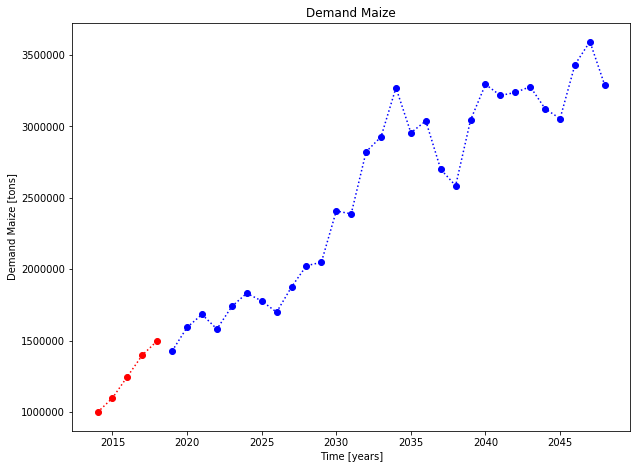

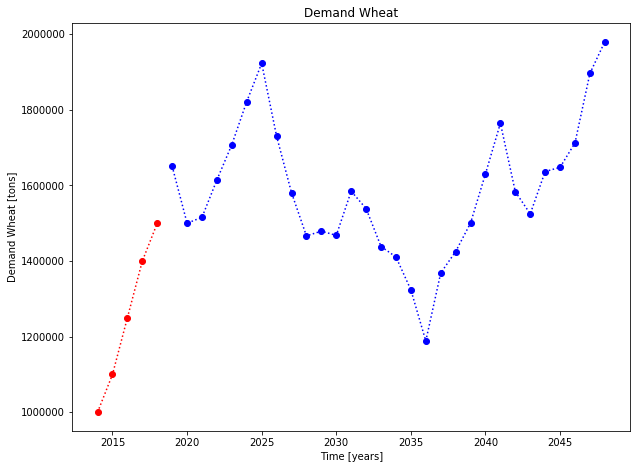

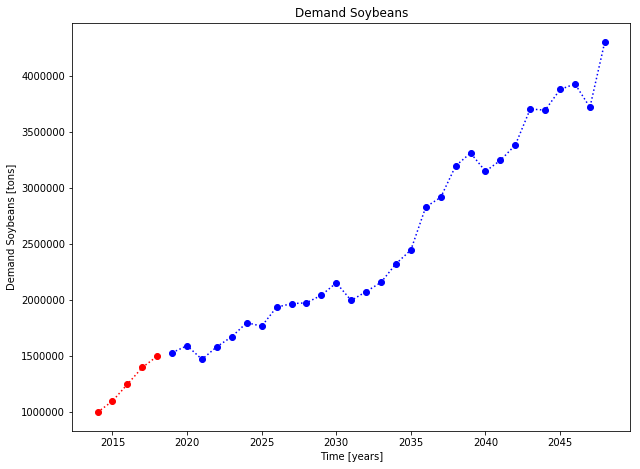

In [3]:
# instantiate a commodity object
maize = objects.Commodity(**defaults.maize_data)
wheat = objects.Commodity(**defaults.wheat_data)
soybeans = objects.Commodity(**defaults.soybean_data)

# create a future througput scenario
maize.scenario_random(startyear = startyear, lifecycle = lifecycle)
wheat.scenario_random(startyear = startyear, lifecycle = lifecycle)
soybeans.scenario_random(startyear = startyear, lifecycle = lifecycle)

demand = [maize, wheat, soybeans]

# plot scenarios 
if True:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

In [4]:
maize.handling_fee = 3
soybeans.handling_fee = 3
wheat.handling_fee = 3

## 0.2 Generate vessels

In [5]:
# instantiate vessels
handysize = objects.Vessel(**defaults.handysize_data)
handymax = objects.Vessel(**defaults.handymax_data)
panamax = objects.Vessel(**defaults.panamax_data)

vessels = [handysize, handymax, panamax]

# 1. Instatiate terminal system

In [6]:
Terminal = system.System(startyear = startyear, lifecycle = lifecycle, elements = demand + vessels, debug=True,
                         crane_type_defaults=defaults.mobile_crane_data, storage_type_defaults=defaults.silo_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [7]:
Terminal.simulate()


Simulate year: 2019
  Total vessel calls: 96
     Handysize calls: 43
     Handymax calls: 27
     Panamax calls: 26
  Total cargo volume: 4611901
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** add Quay to elements
     Berth occupancy planned (after adding quay): inf
     Berth occupancy online (after adding quay): inf
  *** add Harbour crane to elements
     Berth occupancy planned (after add

      a total of 0 ton of storage capacity is online; 25000 ton total planned
  *** add storage to elements
      a total of 0 ton of storage capacity is online; 30000 ton total planned
  *** add storage to elements
      a total of 0 ton of storage capacity is online; 35000 ton total planned
  *** add storage to elements
      a total of 0 ton of storage capacity is online; 40000 ton total planned
  *** add storage to elements
      a total of 0 ton of storage capacity is online; 45000 ton total planned
  *** add storage to elements
      a total of 0 ton of storage capacity is online; 50000 ton total planned
  *** add storage to elements
      a total of 0 ton of storage capacity is online; 55000 ton total planned
  *** add storage to elements
      a total of 0 ton of storage capacity is online; 60000 ton total planned
  *** add storage to elements
      a total of 0 ton of storage capacity is online; 65000 ton total planned
  *** add storage to elements
      a total of 0 ton of st

     a total of 9200 ton of conveyor quay service capacity is online; 10800 ton total planned
     a total of 285000 ton of silo storage capacity is online; 285000 ton total planned
  *** add storage to elements
      a total of 285000 ton of storage capacity is online; 290000 ton total planned
  *** add storage to elements
      a total of 285000 ton of storage capacity is online; 295000 ton total planned
  *** add storage to elements
      a total of 285000 ton of storage capacity is online; 300000 ton total planned
  *** add storage to elements
      a total of 285000 ton of storage capacity is online; 305000 ton total planned
     Station occupancy planned (@ start of year): 0.4215200692415882
     Station occupancy online (@ start of year): 0.4215200692415882
  *** add station to elements
    station_occupancy_planned: 0.35126672436799017
     Revenues (demand): 16363662
     Revenues (throughput): 16725000

Simulate year: 2025
  Total vessel calls: 114
     Handysize calls: 51
  

  *** add Conveyor to elements
     a total of 11200 ton of conveyor quay service capacity is online; 12400 ton total planned
     a total of 310000 ton of silo storage capacity is online; 310000 ton total planned
  *** add storage to elements
      a total of 310000 ton of storage capacity is online; 315000 ton total planned
  *** add storage to elements
      a total of 310000 ton of storage capacity is online; 320000 ton total planned
  *** add storage to elements
      a total of 310000 ton of storage capacity is online; 325000 ton total planned
  *** add storage to elements
      a total of 310000 ton of storage capacity is online; 330000 ton total planned
  *** add storage to elements
      a total of 310000 ton of storage capacity is online; 335000 ton total planned
     Station occupancy planned (@ start of year): 0.3883851614864273
     Station occupancy online (@ start of year): 0.3883851614864273
     Revenues (demand): 18092814
     Revenues (throughput): 18344999

Simulate

  Total vessel calls: 155
     Handysize calls: 81
     Handymax calls: 52
     Panamax calls: 22
  Total cargo volume: 6985909
     a total of 10 Berth_01 is online; 10 total planned
     a total of 10 Quay_01 is online; 10 total planned
     a total of 28 Mobile_crane_01 is online; 28 total planned
     a total of 0 [] is online; 0 total planned
     a total of 37 Quay_conveyor_01 is online; 37 total planned
     a total of 78 Silo_01 is online; 78 total planned
     a total of 0 [] is online; 0 total planned
     a total of 7 Hinterland_station_01 is online; 7 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): 0.396477611641546
     Berth occupancy online (@ start of year): 0.396477611641546
     a total of 14800 ton of quay_conveyor conveyor service capacity is online; 14800 ton total planned
     a total of 14800 ton of conveyor quay service capacity is online; 14800 ton total planned
     a total of 390000 ton of silo storage capacity is online; 3900

     Revenues (throughput): 24569999

Simulate year: 2041
  Total vessel calls: 180
     Handysize calls: 93
     Handymax calls: 59
     Panamax calls: 28
  Total cargo volume: 8229007
     a total of 12 Berth_01 is online; 12 total planned
     a total of 11 Quay_01 is online; 12 total planned
     a total of 33 Mobile_crane_01 is online; 34 total planned
     a total of 0 [] is online; 0 total planned
     a total of 44 Quay_conveyor_01 is online; 45 total planned
     a total of 89 Silo_01 is online; 89 total planned
     a total of 0 [] is online; 0 total planned
     a total of 8 Hinterland_station_01 is online; 8 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): 0.40110910554497825
     Berth occupancy online (@ start of year): 0.40976742342862565
  *** add Harbour crane to elements
     Berth occupancy planned (after adding crane): 0.3929455486832536
     Berth occupancy online (after adding crane): 0.40976742342862565
     Crane occupancy planned

     Berth occupancy planned (after adding crane): 0.39462329028502563
     Berth occupancy online (after adding crane): 0.4082200139156844
     Crane occupancy planned (after adding crane): 0.2651361107978461
     Crane occupancy online (after adding crane): 0.27873283442850494
     a total of 19600 ton of quay_conveyor conveyor service capacity is online; 21200 ton total planned
  *** add Conveyor to elements
     a total of 19600 ton of conveyor quay service capacity is online; 21600 ton total planned
     a total of 500000 ton of silo storage capacity is online; 500000 ton total planned
  *** add storage to elements
      a total of 500000 ton of storage capacity is online; 505000 ton total planned
  *** add storage to elements
      a total of 500000 ton of storage capacity is online; 510000 ton total planned
     Station occupancy planned (@ start of year): 0.3954249376190304
     Station occupancy online (@ start of year): 0.3954249376190304
     Revenues (demand): 27631140
    

## Report all elements

In [8]:
if Terminal.debug:
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)


Maize

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':     year   volume
0   2019  1429131
1   2020  1594056
2   2021  1684684
3   2022  1582529
4   2023  1740515
5   2024  1833047
6   2025  1779003
7   2026  1700477
8   2027  1876823
9   2028  2025694
10  2029  2049228
11  2030  2408850
12  2031  2388308
13  2032  2823250
14  2033  2927461
15  2034  3270840
16  2035  2955981
17  2036  3038662
18  2037  2700184
19  2038  2585438
20  2039  3044965
21  2040  3294372
22  2041  3217098
23  2042  3237841
24  2043  3278292
25  2044  3123568
26  2045  3055269
27  2046  3433141
28  2047  3593646
29  2048  3286871, 'handling_fee': 3, 'handysize_perc': 50, 'handymax_perc': 50, 'panamax_perc': 0, 'name': 'Maize', 'id': 'c57e3c4c-537f-11e9-8592-60f677ba2ce0'}

Wheat

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':     y

29  2048       0.0      51000.0     5100.0  21153.6, 'quay': <terminal_optimization.objects.Conveyor_Quay object at 0x00000198CEA33B70>}

Quay_conveyor_01

{'triggers': [], 'renevue': [], 'labour': [], 'maintenance': 51000.0, 'energy': 21153.600000000002, 'insurance': 5100.0, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 510000, 'type': 'quay_conveyor', 'length': 200, 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 10, 'unit_rate_factor': 6, 'mobilisation': 30000, 'maintenance_perc': 0.1, 'insurance_perc': 0.01, 'consumption_constant': 81, 'consumption_coefficient': 0.08, 'crew': 1, 'utilisation': 0.8, 'capacity_steps': 400, 'year_purchase': [], 'year_online': 2021, 'name': 'Quay_conveyor_01', 'id': 'c62a81be-537f-11e9-89c7-60f677ba2ce0', 'df':     year     capex  maintenance  insurance   energy
0   2019       0.0          0.0        0.0      0.0
1   2020  510000.0          0.0        0.0      0.0
2   2021       0.0      51000.0     5100.0  21153.6
3   2022  

{'triggers': [], 'renevue': [], 'labour': [], 'maintenance': 10000.0, 'energy': 4446.0, 'insurance': 5000.0, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 500000, 'type': 'silo', 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 30, 'unit_rate': 60, 'mobilisation_min': 200000, 'mobilisation_perc': 0.003, 'maintenance_perc': 0.02, 'crew': 1, 'insurance_perc': 0.01, 'storage_type': 'Silos', 'consumption': 0.002, 'capacity': 5000, 'occupancy': 0.95, 'year_purchase': [], 'year_online': 2021, 'name': 'Silo_01', 'id': 'c65b2b90-537f-11e9-8c81-60f677ba2ce0', 'df':     year     capex  maintenance  insurance  energy
0   2019       0.0          0.0        0.0     0.0
1   2020  500000.0          0.0        0.0     0.0
2   2021       0.0      10000.0     5000.0  4446.0
3   2022       0.0      10000.0     5000.0  4446.0
4   2023       0.0      10000.0     5000.0  4446.0
5   2024       0.0      10000.0     5000.0  4446.0
6   2025       0.0      10000.0     5000.0  4446.0
7  

29  2048       0.0      10000.0     5000.0  4446.0}

Silo_01

{'triggers': [], 'renevue': [], 'labour': [], 'maintenance': 10000.0, 'energy': 4446.0, 'insurance': 5000.0, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 500000, 'type': 'silo', 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 30, 'unit_rate': 60, 'mobilisation_min': 200000, 'mobilisation_perc': 0.003, 'maintenance_perc': 0.02, 'crew': 1, 'insurance_perc': 0.01, 'storage_type': 'Silos', 'consumption': 0.002, 'capacity': 5000, 'occupancy': 0.95, 'year_purchase': [], 'year_online': 2021, 'name': 'Silo_01', 'id': 'c66fc4fa-537f-11e9-bb52-60f677ba2ce0', 'df':     year     capex  maintenance  insurance  energy
0   2019       0.0          0.0        0.0     0.0
1   2020  500000.0          0.0        0.0     0.0
2   2021       0.0      10000.0     5000.0  4446.0
3   2022       0.0      10000.0     5000.0  4446.0
4   2023       0.0      10000.0     5000.0  4446.0
5   2024       0.0      10000.0     5000.0 

29  2048        0.0      20000.0    10000.0  19727.139241}

Mobile_crane_01

{'triggers': [], 'renevue': [], 'labour': 180900.0, 'maintenance': 76475.0, 'energy': 73677.59562841529, 'insurance': 38237.5, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 3823750, 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 40, 'unit_rate': 3325000, 'mobilisation_perc': 0.15, 'maintenance_perc': 0.02, 'consumption': 485, 'insurance_perc': 0.01, 'crew': 3, 'crane_type': 'Mobile crane', 'lifting_capacity': 30, 'hourly_cycles': 25, 'eff_fact': 0.35, 'payload': 21, 'peak_capacity': 525, 'effective_capacity': 183, 'year_purchase': [], 'year_online': 2029, 'name': 'Mobile_crane_01', 'id': 'c6c52c48-537f-11e9-98ad-60f677ba2ce0', 'shift': 10.8, 'df':     year      capex  maintenance  insurance        energy    labour
0   2019        0.0          0.0        0.0      0.000000       0.0
1   2020        0.0          0.0        0.0      0.000000       0.0
2   2021        0.0          0.0   

29  2048       0.0      10000.0     5000.0  4446.0}

Silo_01

{'triggers': [], 'renevue': [], 'labour': [], 'maintenance': 10000.0, 'energy': 4446.0, 'insurance': 5000.0, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 500000, 'type': 'silo', 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 30, 'unit_rate': 60, 'mobilisation_min': 200000, 'mobilisation_perc': 0.003, 'maintenance_perc': 0.02, 'crew': 1, 'insurance_perc': 0.01, 'storage_type': 'Silos', 'consumption': 0.002, 'capacity': 5000, 'occupancy': 0.95, 'year_purchase': [], 'year_online': 2031, 'name': 'Silo_01', 'id': 'c6e13fca-537f-11e9-be59-60f677ba2ce0', 'df':     year     capex  maintenance  insurance  energy
0   2019       0.0          0.0        0.0     0.0
1   2020       0.0          0.0        0.0     0.0
2   2021       0.0          0.0        0.0     0.0
3   2022       0.0          0.0        0.0     0.0
4   2023       0.0          0.0        0.0     0.0
5   2024       0.0          0.0        0.0 


{'triggers': [], 'renevue': [], 'labour': [], 'maintenance': 51000.0, 'energy': 22760.403787450537, 'insurance': 5100.0, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 510000, 'type': 'quay_conveyor', 'length': 200, 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 10, 'unit_rate_factor': 6, 'mobilisation': 30000, 'maintenance_perc': 0.1, 'insurance_perc': 0.01, 'consumption_constant': 81, 'consumption_coefficient': 0.08, 'crew': 1, 'utilisation': 0.8, 'capacity_steps': 400, 'year_purchase': [], 'year_online': 2041, 'name': 'Quay_conveyor_01', 'id': 'c74555d8-537f-11e9-8627-60f677ba2ce0', 'df':     year     capex  maintenance  insurance        energy
0   2019       0.0          0.0        0.0      0.000000
1   2020       0.0          0.0        0.0      0.000000
2   2021       0.0          0.0        0.0      0.000000
3   2022       0.0          0.0        0.0      0.000000
4   2023       0.0          0.0        0.0      0.000000
5   2024       0.0          0.0

29  2048       0.0      51000.0     5100.0  21670.140421, 'quay': <terminal_optimization.objects.Conveyor_Quay object at 0x00000198CECB0FD0>}

Silo_01

{'triggers': [], 'renevue': [], 'labour': [], 'maintenance': 10000.0, 'energy': 4446.0, 'insurance': 5000.0, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 500000, 'type': 'silo', 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 30, 'unit_rate': 60, 'mobilisation_min': 200000, 'mobilisation_perc': 0.003, 'maintenance_perc': 0.02, 'crew': 1, 'insurance_perc': 0.01, 'storage_type': 'Silos', 'consumption': 0.002, 'capacity': 5000, 'occupancy': 0.95, 'year_purchase': [], 'year_online': 2042, 'name': 'Silo_01', 'id': 'c7685852-537f-11e9-ac7d-60f677ba2ce0', 'df':     year     capex  maintenance  insurance  energy
0   2019       0.0          0.0        0.0     0.0
1   2020       0.0          0.0        0.0     0.0
2   2021       0.0          0.0        0.0     0.0
3   2022       0.0          0.0        0.0     0.0
4   

29  2048       0.0      51000.0     5100.0  21588.307216, 'quay': <terminal_optimization.objects.Conveyor_Quay object at 0x00000198CECEE5C0>}

Silo_01

{'triggers': [], 'renevue': [], 'labour': [], 'maintenance': 10000.0, 'energy': 4446.0, 'insurance': 5000.0, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 500000, 'type': 'silo', 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 30, 'unit_rate': 60, 'mobilisation_min': 200000, 'mobilisation_perc': 0.003, 'maintenance_perc': 0.02, 'crew': 1, 'insurance_perc': 0.01, 'storage_type': 'Silos', 'consumption': 0.002, 'capacity': 5000, 'occupancy': 0.95, 'year_purchase': [], 'year_online': 2048, 'name': 'Silo_01', 'id': 'c7a9f362-537f-11e9-a4e5-60f677ba2ce0', 'df':     year     capex  maintenance  insurance  energy
0   2019       0.0          0.0        0.0     0.0
1   2020       0.0          0.0        0.0     0.0
2   2021       0.0          0.0        0.0     0.0
3   2022       0.0          0.0        0.0     0.0
4   

29  2048    0.0          0.0        0.0     0.0, 'quay': <terminal_optimization.objects.Conveyor_Quay object at 0x00000198CECEEF98>}

Silo_01

{'triggers': [], 'renevue': [], 'labour': [], 'maintenance': 10000.0, 'energy': 4446.0, 'insurance': 5000.0, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 500000, 'type': 'silo', 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 30, 'unit_rate': 60, 'mobilisation_min': 200000, 'mobilisation_perc': 0.003, 'maintenance_perc': 0.02, 'crew': 1, 'insurance_perc': 0.01, 'storage_type': 'Silos', 'consumption': 0.002, 'capacity': 5000, 'occupancy': 0.95, 'year_purchase': [], 'year_online': 2049, 'name': 'Silo_01', 'id': 'c7bc9100-537f-11e9-9d91-60f677ba2ce0', 'df':     year     capex  maintenance  insurance  energy
0   2019       0.0          0.0        0.0     0.0
1   2020       0.0          0.0        0.0     0.0
2   2021       0.0          0.0        0.0     0.0
3   2022       0.0          0.0        0.0     0.0
4   2023     

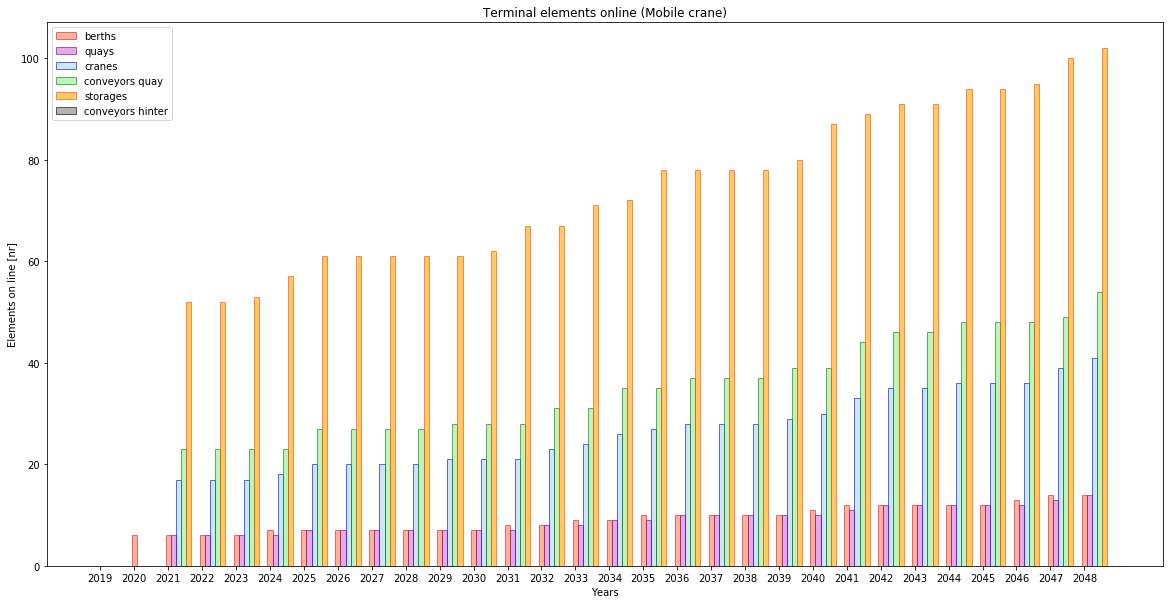

In [9]:
Terminal.terminal_elements_plot()

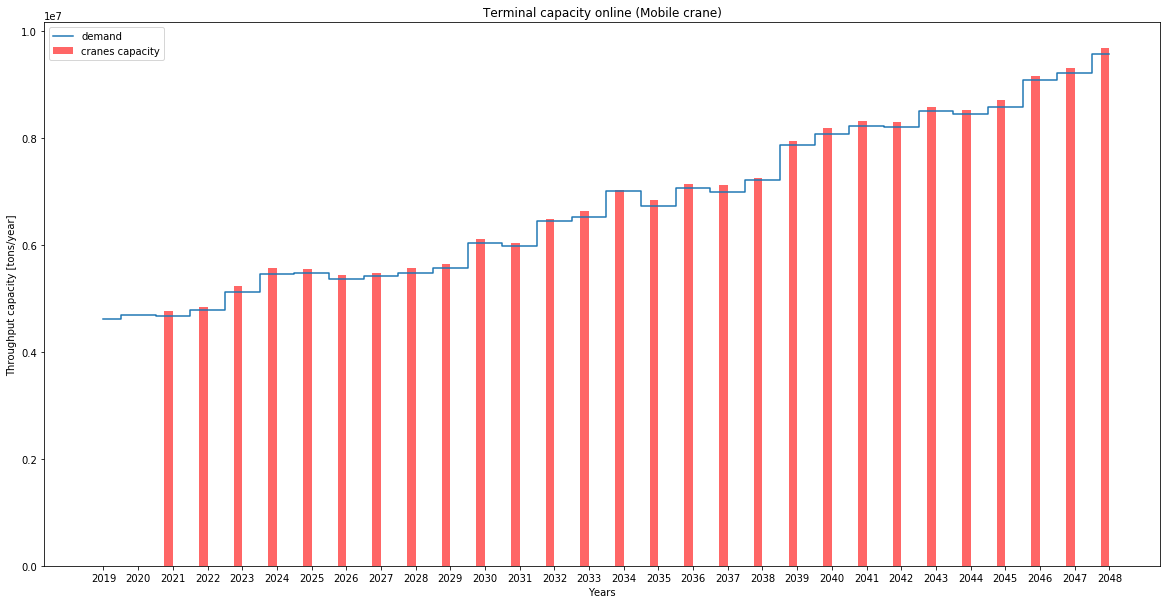

In [10]:
Terminal.terminal_capacity_plot()

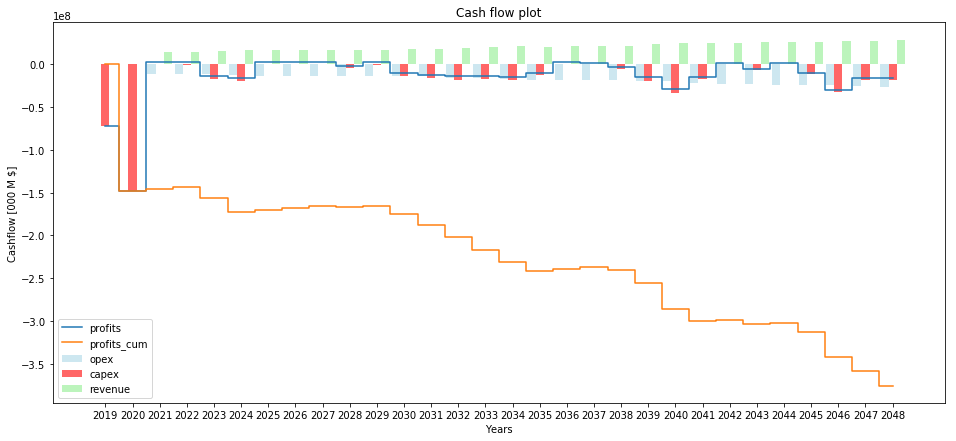

In [11]:
Terminal.cashflow_plot()

## SandBox

In [12]:
Terminal.NPV()

PV: [-7.24409600e+07 -1.47844390e+08  2.26275270e+06  2.09304370e+06
 -1.33675743e+07 -1.59782367e+07  2.61108224e+06  2.30605124e+06
  2.48080724e+06 -1.72684376e+06  1.97352882e+06 -9.80950418e+06
 -1.30526892e+07 -1.43597420e+07 -1.42495609e+07 -1.45962128e+07
 -1.02236686e+07  2.14387035e+06  1.92492435e+06 -3.25257365e+06
 -1.54758737e+07 -2.95042858e+07 -1.44597766e+07  1.26476983e+06
 -5.16905317e+06  1.39097277e+06 -9.86313923e+06 -2.98136702e+07
 -1.66174290e+07 -1.63896064e+07]
NPV: -447742986.71419334


## Add a supply chain graph
The graph should be useable to detect if all elements of the supplychain are in place. 
Only when a path through the supply chain is available can revenue be obtained. 
This is still an experimental functionality and not yet fully implemented. 

In [13]:
# *** specify supply chain logic
# 1. create object types
quay = objects.Quay_wall(**defaults.quay_wall_data)
berth = objects.Berth(**defaults.berth_data)
crane = objects.Cyclic_Unloader(**defaults.gantry_crane_data)
screw = objects.Continuous_Unloader(**defaults.continuous_screw_data)
conveyor1 = objects.Conveyor(**defaults.quay_conveyor_data)
storage = objects.Storage(**defaults.silo_data)
conveyor2 = objects.Conveyor(**defaults.hinterland_conveyor_data)
unloading_station = objects.Unloading_station(**defaults.hinterland_station_data)

# 2. specify nodes and edges
nodes = [quay, berth, crane, screw, conveyor1, storage, conveyor2, unloading_station]
edges = [[quay, berth],
         [berth, crane],
         [crane, screw],
         [screw, conveyor1],
         [conveyor1, storage],
         [storage, conveyor2],
         [conveyor2, unloading_station]]

# 3. invoke the supply_chain method
Terminal.supply_chain(nodes, edges)

AttributeError: module 'terminal_optimization.objects' has no attribute 'Conveyor'

In [ ]:
Terminal.plot_system()